In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.svm import LinearSVC
%matplotlib inline

Sacamos los datos y los deshuesamos para poder compararlos mas facilmente. 

In [74]:
data = pd.read_csv('OJ.csv')
data = data.dropna()
data = data.drop("Unnamed: 0",axis=1)
X = np.array(data[['LoyalCH','PriceDiff']])
Y1 = np.array(data['Purchase'])
Y1[Y1=='CH'] = 0
Y1[Y1=='MM'] = 1
X1 = X[:,0]
X2 = X[:,1]
Y_N= Y1[Y1==0]
Y_S= Y1[Y1==1]
X1_N = X1[Y1==0]
X1_S = X1[Y1==1]
X2_N = X2[Y1==0]
X2_S = X2[Y1==1]
#print(np.shape(X1))
#print(np.shape(Y1))
Y1.dtype
print(np.shape(X1))

(1070,)


Ahora realizamos un metodo que recorre un amplio rango de posibilidades de intercepciones como de pendientes, 
usando como factor de comparación lo que se llama acá, el factor de eficiencia $e=\frac{neg_{correctas}}{neg_{totales}} \times \frac{pos_{correctas}}{pos_{totales}}$  Este va de 0 a 1. 

In [75]:
intersecciones = np.linspace(-10,10,100)
pendientes = np.linspace(-10,10,100)
NTotal = len(Y_N)
STotal = len(Y_S)
eficiencias = [0]
trios =[]
for i in intersecciones:
    for j in pendientes:
        ns = 0
        nn = 0
        for y in range(STotal):
            if (i+j*X1_S[y])>(X2_S[y]):
                ns=ns+1
        for y in range(NTotal):
            if (i+j*X1_N[y])<(X2_N[y]):
                nn=nn+1
        estaEficiencia = (nn/NTotal)*(ns/STotal)
        eficiencias.append(estaEficiencia) 
        if max(eficiencias)==estaEficiencia:
            trios.append([i,j,estaEficiencia])


Visualizemos el resultado imprimiendo los coeficientes y la eficiencia.

[1.5151515151515156, -2.525252525252525, 0.6840812189452112]


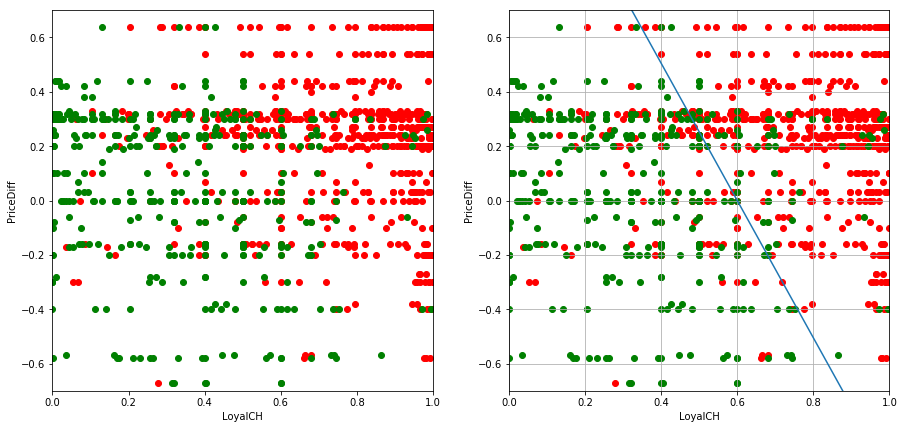

In [97]:
interseccion = trios[-1][0]
pendiente = trios[-1][1]
x = np.linspace(0,1,100)
recta = interseccion + x*pendiente
plt.figure(figsize=(15,7))

plt.subplot(121)
_ = plt.scatter(X1[Y1==0], X2[Y1==0], c='r')
_ = plt.scatter(X1[Y1==1], X2[Y1==1], c='g')
_ = plt.ylim((-0.7,0.7))
_ = plt.xlim((0,1))
_ = plt.xlabel('LoyalCH')
_ = plt.ylabel('PriceDiff')

plt.subplot(122)
_ = plt.scatter(X1[Y1==0], X2[Y1==0], c='r')
_ = plt.scatter(X1[Y1==1], X2[Y1==1], c='g')
_ = plt.plot(x,recta)
_ = plt.ylim((-0.7,0.7))
_ = plt.xlim((0,1))
_ = plt.xlabel('LoyalCH')
_ = plt.ylabel('PriceDiff')
_ = plt.grid(alpha=1,linestyle='-')
print(trios[-1])

Tratemos ahora de usar la funcion de sklearn. 

In [99]:
data = pd.read_csv('OJ.csv')
data = data.dropna()
data = data.drop("Unnamed: 0",axis=1)
X = data[['LoyalCH','PriceDiff']]
Y1 = data['Purchase']
sv = LinearSVC()
sv.fit(X,Y1)
o = sv.decision_function(X)
YY, XX = np.meshgrid(X2, X1)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = sv.decision_function(xy).reshape(XX.shape)

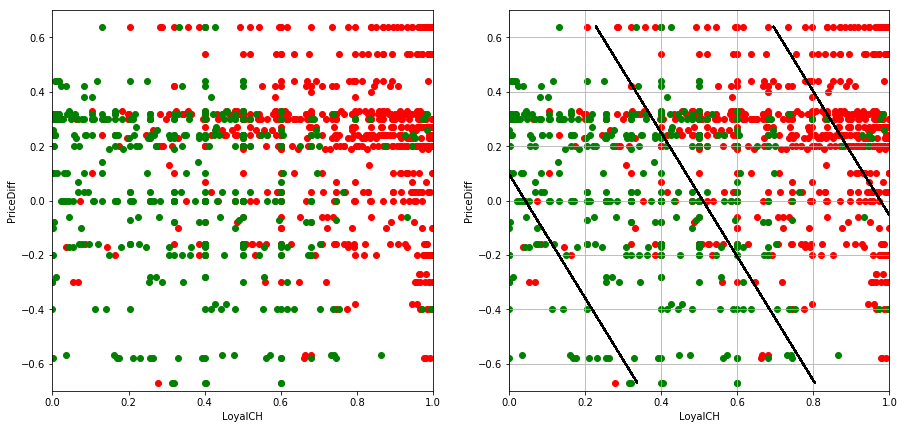

In [100]:

plt.figure(figsize=(15,7))

plt.subplot(121)
_ = plt.scatter(X1[Y1=='CH'], X2[Y1=='CH'], c='r')
_ = plt.scatter(X1[Y1=='MM'], X2[Y1=='MM'], c='g')
_ = plt.ylim((-0.7,0.7))
_ = plt.xlim((0,1))
_ = plt.xlabel('LoyalCH')
_ = plt.ylabel('PriceDiff')

plt.subplot(122)
_ = plt.scatter(X1[Y1=='CH'], X2[Y1=='CH'], c='r')
_ = plt.scatter(X1[Y1=='MM'], X2[Y1=='MM'], c='g')
_ = plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=[':', '-', ':'])
_ = plt.ylim((-0.7,0.7))
_ = plt.xlim((0,1))
_ = plt.xlabel('LoyalCH')
_ = plt.ylabel('PriceDiff')
_ = plt.grid(alpha=1,linestyle='-')

(-0.7, 0.7)

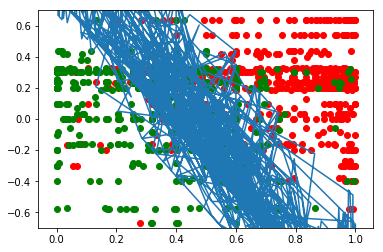

In [71]:
ns = 0
nn = 0
for y in range(STotal):
    if (((sv.coef_[0][1])+(sv.coef_[0][0])*X1_S[y])>(X2_S[y])):
        ns=ns+1
for y in range(NTotal):
    if (((sv.coef_[0][1])+(sv.coef_[0][0])*X1_N[y])<(X2_N[y])):
        nn=nn+1
estaEficiencia = (nn/NTotal)*(ns/STotal)
x = np.linspace(0,1,100)
plt.scatter(X1[Y1=='CH'], X2[Y1=='CH'], c='r')
plt.scatter(X1[Y1=='MM'], X2[Y1=='MM'], c='g')
recta = sv.coef_[0][1] + x*sv.coef_[0][0]
plt.plot(X1,o)
plt.ylim((-0.7,0.7))